<a href="https://colab.research.google.com/github/Ziadnasser1/Machine-Learning-Training/blob/master/BayesianClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All the libraries used in this code.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

Loading the IRIS data and taking the data and the labels out of it.

In [ ]:
iris = load_iris()
data = iris.data
labels = iris.target
print(iris)

Manually written function to split the data into Train, Test and validate.

In [ ]:
def train_validate_test_split(data, labels, testRatio=0.3, valRatio=0.3):
  # Split the size of the data on test, validate and train.
  total_size = len(data)
  test_size = int(total_size * testRatio)
  valid_size = int(total_size * valRatio)
  train_size = total_size - (test_size + valid_size)

  # Generates a random permutation of indices from 0 to total_size - 1
  indices = np.random.permutation(total_size)
  # Splitting the data and the labels.
  train_data = data[indices[:train_size]]
  val_data = data[indices[train_size:train_size +  valid_size]]
  test_data = data[indices[train_size + valid_size:]]
  train_labels = labels[indices[:train_size]]
  val_labels = labels[indices[train_size:train_size + valid_size]]
  test_labels = labels[indices[train_size + valid_size:]]

  return train_data, val_data, test_data, train_labels, val_labels, test_labels

Training the model on the splitted data.

In [ ]:
# Splitting the data and training the Naive Bayes model.
train_data, val_data, test_data, train_labels, val_labels, test_labels = train_validate_test_split(data, labels)
model = GaussianNB()
model.fit(train_data, train_labels)

GaussianNB()

Manualy written function to calculate the accuracy.

In [ ]:
def calculate_accuracy(predicted_y, y):
  #first way to calculate the accuracy.
  return np.mean(predicted_y == y) * 100

  #second way to calculate the accuracy.

  # total = len(predicted_y)
  # correct = 0
  # for i in range(total):
  #   print(predicted_y == y)
  #   if predicted_y[i] == y[i]:
  #     correct += 1
  # accuracy = (correct / total) * 100
  return accuracy

In [ ]:
predicted_val = model.predict(val_data)
val_accuracy = calculate_accuracy(predicted_val, val_labels)
print(f"Validation Set Accuracy: {val_accuracy:.2f}%")

Validation Set Accuracy: 97.78%


Plotting the Decision boundary of the data.

In [ ]:
def plot_decision_boundary(X, y, model):
    h = .02

    # find the minimum and maximum valuse in the first and second features.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # create a meshgrid determined by the max and min points to create a 2D grid.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # train the model again over only two features to be able to draw.
    model_2d = GaussianNB()
    model_2d.fit(X, y)

    Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Decision Boundaries')
    plt.show()

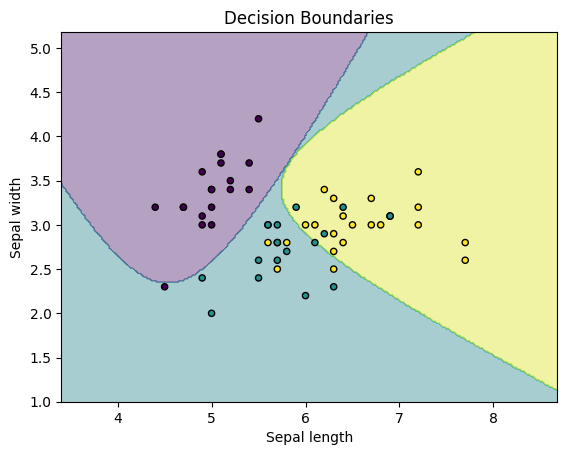

In [ ]:

plot_decision_boundary(train_data[:, :2], train_labels, model)